## Homework 3 Q5: Two Layer Net

In [1]:
__NAME__ = "Seonho Woo"
__UNIQID__ = "clairewo"

print(f"Your name and email: {__NAME__} <{__UNIQID__}@umich.edu>")
assert __NAME__ and __UNIQID__

Your name and email: Seonho Woo <clairewo@umich.edu>


# Implementing a Two-layer Neural Network
In this notebook, you will implement a neural network with two fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

After implementing the two-layer neural network, you will report the training loss/accuracy plot and the test performance on MNIST dataset.

## Setup code
Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook. Let's start by checking whether we are using Python 3.10 or higher.

In [2]:
import sys
if sys.version_info[0] < 3:
    raise Exception("You must use Python 3")

if sys.version_info[1] < 10:
    print("Autograder will execute your code based on Python 3.10 environment. Please use Python 3.10 or higher to prevent any issues")
    print("You can create a conda environment with Python 3.10 like 'conda create --name eecs545 python=3.10'")
    raise Exception("Python 3 version is too low: {}".format(sys.version))
else:
    print("You are good to go")

You are good to go


First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [3]:
%load_ext autoreload
%autoreload 2

Once you located the `two_layer_net.py` correctly, run the following cell allow us to import from `two_layer_net.py`. If it works correctly, it should print the message:
```Hello from two_layer_net.py```

In [4]:
from two_layer_net import hello
hello()

Hello from two_layer_net.py!


Then, we run some setup code for this notebook: Import some useful packages and increase the default figure size.

In [5]:
# install required libraries
!pip install numpy==1.24.1 matplotlib==3.6.2 scikit-learn==1.2.0

# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# set figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

We additionally load a toy dataset, which helps us to debug your initial implementation of forward and backward path.

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```


The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

### Forward pass with a toy dataset

First we will implement the forward pass of the network which uses the weights and biases to compute scores for all inputs.

<span class="instruction">Please complete the forward pass code in `fc_forward` of `two_layer_net.py`</span>. The distance gap between your output and the answer should be smaller than 1e-10.

In [7]:
from gradient_check import rel_error
from two_layer_net import fc_forward

num_inputs = 2
dim = 120
output_dim = 3

input_size = num_inputs * dim
weight_size = output_dim * dim

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, dim)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(dim, output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = fc_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error might be less than 1e-9.
# As long as your error is small enough, your implementation should pass this test.
print('Testing fc_forward function:')
print('difference: ', rel_error(out, correct_out))
print()
np.testing.assert_allclose(out, correct_out, atol=1e-8)

Testing fc_forward function:
difference:  9.769849468192957e-10



### Backward pass
Now, we implement `fc_backward` function and test your implementation using numeric gradient checking.

<span class="instruction">Please complete `fc_backward` of `two_layer_net.py`</span>. 

In [8]:
from gradient_check import rel_error, eval_numerical_gradient_array
from two_layer_net import fc_forward, fc_backward

# Test the affine_backward function
np.random.seed(545)
x = np.random.randn(10, 6)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: fc_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: fc_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: fc_forward(x, w, b)[0], b, dout)

_, cache = fc_forward(x, w, b)
dx, dw, db = fc_backward(dout, cache)

# The error should be around 1e-10
print('\nTesting fc_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))
print()

np.testing.assert_allclose(dx, dx_num, atol=1e-8)
np.testing.assert_allclose(dw, dw_num, atol=1e-8)
np.testing.assert_allclose(db, db_num, atol=1e-8)


Testing fc_backward function:
dx error:  1.4295356505837676e-10
dw error:  4.1454302913413543e-11
db error:  1.8455297469808996e-11



### ReLU activation: forward

We would like to use ReLU as the intermediate nonlinearity function.
<span class="instruction">Please implement the forward pass for the ReLU activation function in the `relu_forward` function in `two_layer_net.py`</span>. 
Once you implement this function, you can test your implementation using the following:

In [9]:
from gradient_check import rel_error
from two_layer_net import relu_forward

# ReLU layer: forward
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error might be around 5e-8
# As long as your error is small enough, your implementation should pass this test.
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))
print()

np.testing.assert_allclose(out, correct_out, atol=1e-7)

Testing relu_forward function:
difference:  4.999999798022158e-08



### ReLU activation: backward
Now, we implement the backward pass for the ReLU activation function.
<span class="instruction"> Please complete `relu_backward` function in `two_layer_net.py`</span>. 
You can test your implementation using numeric gradient checking:

In [10]:
from gradient_check import rel_error, eval_numerical_gradient_array
from two_layer_net import relu_forward, relu_backward

# ReLU layer: backward
np.random.seed(545)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 3e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print()
np.testing.assert_allclose(dx, dx_num, atol=1e-9)

Testing relu_backward function:
dx error:  3.275653692654557e-12



### "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, fully connected layer are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define `fc_relu_forward` and `fc_relu_backward` functions below.

For now take a look at the `fc_relu_forward` and `fc_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [11]:
from gradient_check import rel_error, eval_numerical_gradient_array
from two_layer_net import fc_forward, relu_forward, fc_backward, relu_backward


def fc_relu_forward(x, w, b):
    """
    Convenience layer that perorms an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, fc_cache = fc_forward(x, w, b)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache


def fc_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    """
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dw, db = fc_backward(da, fc_cache)
    return dx, dw, db


# Sandwich layer test
np.random.seed(545)
x = np.random.randn(10, 6)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

out, cache = fc_relu_forward(x, w, b)
dx, dw, db = fc_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: fc_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: fc_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: fc_relu_forward(x, w, b)[0], b, dout)

# Relative error should be less than e-9
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  3.96470157516284e-10
dw error:  1.7403731751026108e-09
db error:  3.2757014062576862e-12


### Loss layers: Softmax
Now implement the loss and gradient for Softmax. <span class="instruction">Please implement `softmax_loss` function in `two_layers_net.py`.</span> You can make sure that the implementations are correct by running the following:

In [12]:
#y[range(x.shape[0])]

In [13]:
from gradient_check import rel_error, eval_numerical_gradient
from two_layer_net import softmax_loss

# Softmax loss
np.random.seed(545)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be around 2.3 and dx error might be around 8e-9
# As long as your error is small enough, your implementation should pass this test.
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))
print()

np.testing.assert_allclose(loss, 2.3, atol=0.05)
np.testing.assert_allclose(dx, dx_num, atol=1e-7)


Testing softmax_loss:
loss:  2.302415175952529
dx error:  7.966926265979073e-09



### Two-layer network
As we have all component, <span class="instruction">now we would like to implement the `TwoLayerNet` class in `two_layers_net.py'.</span> Read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [14]:
from gradient_check import rel_error, eval_numerical_gradient, eval_numerical_gradient_array
from two_layer_net import TwoLayerNet

np.random.seed(545)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

# relative error should be less than 1e-7
for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing training loss
W1 relative error: 1.83e-08
W2 relative error: 3.12e-10
b1 relative error: 9.83e-09
b2 relative error: 4.33e-10


## Let's test our model with a dataset: MNIST
MNIST is commonly used for training various image processing systems. This dataset stores handwritten digits with matched number as label.  

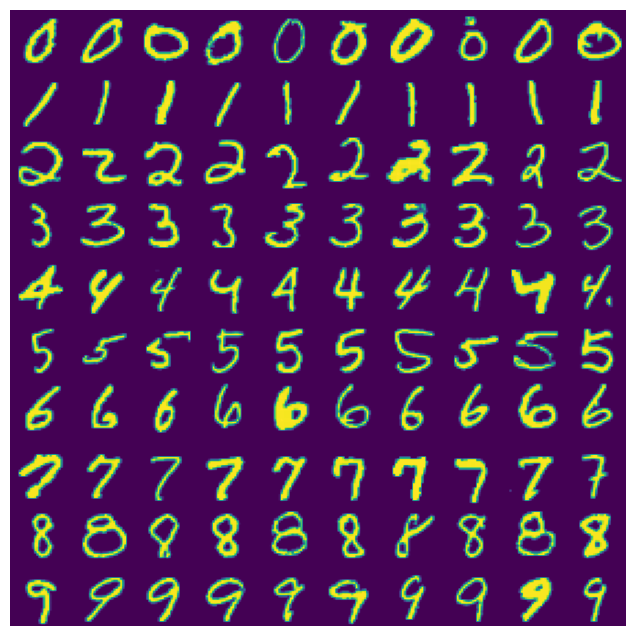

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt


def make_grid(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex // ncols
    assert nindex == nrows * ncols
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height * nrows, width * ncols, intensity))
    return result


def process_mnist(path, visualize=True, fully_connected=True):
    mnist = np.load(path)
    x_train = mnist['x_train']
    y_train = mnist['y_train']
    x_test = mnist['x_test']
    y_test = mnist['y_test']
    
    num_test = len(y_test)
    
    if visualize:
        samples_per_class = 10
        samples = []
        np.random.seed(0)
        random.seed(0)
        
        for y in range(10):
            idxs = np.nonzero(y_train == y)[0]
            for i in range(samples_per_class):
                idx = idxs[random.randrange(idxs.shape[0])]
                samples.append(x_train[idx])
        img = make_grid(np.expand_dims(np.array(samples), -1), ncols=samples_per_class)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    if fully_connected:
        # data preprocessing for neural network with fully-connected layers
        data = {
            'X_train': np.array(x_train[:55000], np.float32).reshape((55000, -1)),  # training data
            'y_train': np.array(y_train[:55000], np.int32),  # training labels
            'X_val': np.array(x_train[55000:], np.float32).reshape((5000, -1)),  # validation data
            'y_val': np.array(y_train[55000:], np.int32),  # validation labels
            'X_test': x_test.reshape((num_test, -1)),  # test data
            'y_test': y_test,  # test labels
        }
    else:
        # data preprocessing for neural network with convolutional layers
        data = {
           'X_train': np.array(x_train[:55000], np.float32).reshape((55000, 1, 28, 28)),  # training data
           'y_train': np.array(y_train[:55000], np.int32),  # training labels
           'X_val': np.array(x_train[55000:], np.float32).reshape((5000, 1, 28, 28)),  # validation data
           'y_val': np.array(y_train[55000:], np.int32),  # validation labels
           'X_test': x_test,  # test data
           'y_test': y_test,  # test labels
        }
    return data

q5_data = process_mnist('data/q5_data/mnist.npz', visualize=True, fully_connected=True)

### Train the network
We first want to train our two layer network.

In [16]:
import solver
from two_layer_net import TwoLayerNet

D = 28*28
C = 10
H = 100
std = 1e-3

model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)
# the update rule of 'adam' can be used to replace 'sgd' if it is helpful.
s = solver.Solver(model, q5_data,
                       update_rule='sgd',
                       optim_config={'learning_rate': 1e-3,},
                       lr_decay=0.95,
                       num_epochs=5, batch_size=100,
                       verbose=False, print_every=10000)
s.train()

(Epoch 0 / 5) train acc: 19.60%    val_acc: 20.36%
(Epoch 1 / 5) train acc: 92.90%    val_acc: 94.60%
(Epoch 2 / 5) train acc: 94.90%    val_acc: 96.04%
(Epoch 3 / 5) train acc: 97.10%    val_acc: 96.80%
(Epoch 4 / 5) train acc: 97.30%    val_acc: 97.36%
(Epoch 5 / 5) train acc: 96.30%    val_acc: 97.06%


Let's plot the loss function and the accuracies on the training and validation sets during optimization. <span class="instruction">Please report 'two_layer_net.png' file in your **writeup**.</span>

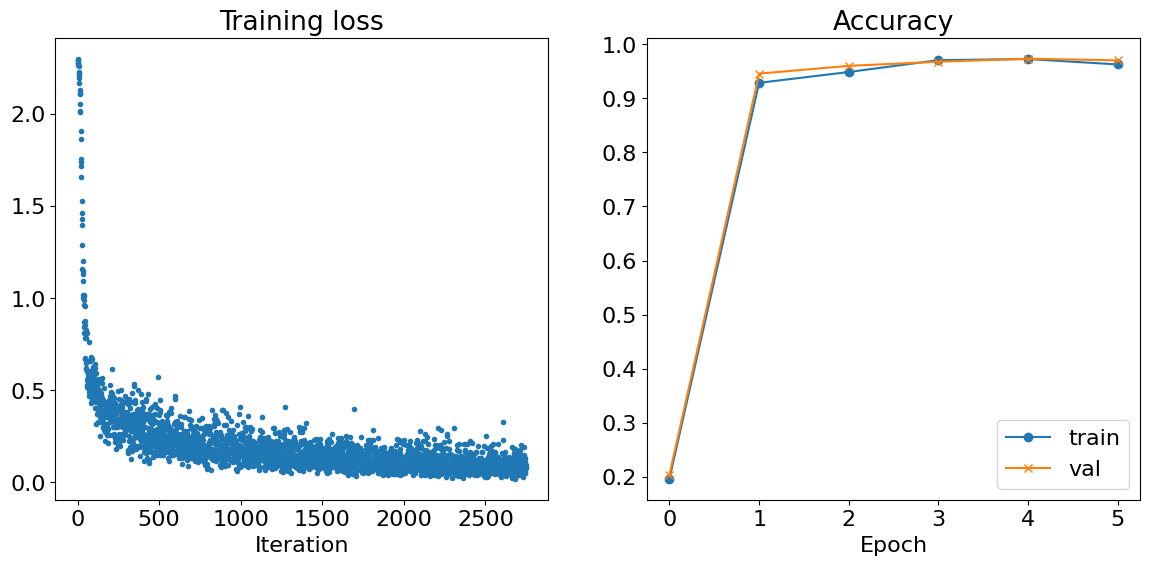

In [17]:
plt.subplot(1, 2, 1)
plt.title('Training loss')
plt.plot(s.loss_history, '.')
plt.xlabel('Iteration')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(s.train_acc_history, '-o', label='train')
plt.plot(s.val_acc_history, '-x', label='val')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(14, 6)

plt.savefig('two_layer_net.png', dpi=256)

Lastly, we want to check the performance over the testset. (Our best model gets around 96% test-set accuracy -- did you beat us?) <span class="instruction">Please report your test accuracy in your **writeup**</span>.

In [18]:
test_acc = s.check_accuracy(X=np.array(q5_data['X_test'], np.float32), y=q5_data['y_test'])
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Test accuracy: 96.31%
